In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [11]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

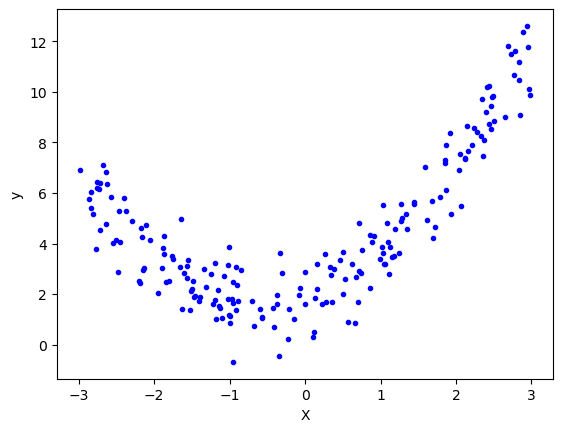

In [12]:
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [13]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.031069283591833696

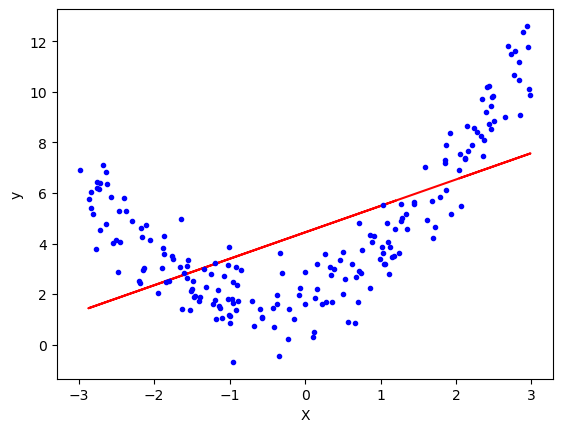

In [17]:
plt.plot(X_train, lr.predict(X_train), color = 'r')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [23]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree = 2, include_bias = True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [24]:
print(X_train[0])
print(X_train_trans[0])

[1.19535333]
[1.         1.19535333 1.42886959]


In [25]:
lr = LinearRegression()

lr.fit(X_train_trans,y_train)

y_pred = lr.predict(X_test_trans)

r2_score(y_test,y_pred)

0.8822884061668486

In [26]:
lr.coef_

array([[0.        , 0.92798129, 0.79747516]])

In [27]:
lr.intercept_

array([2.05693442])

In [33]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

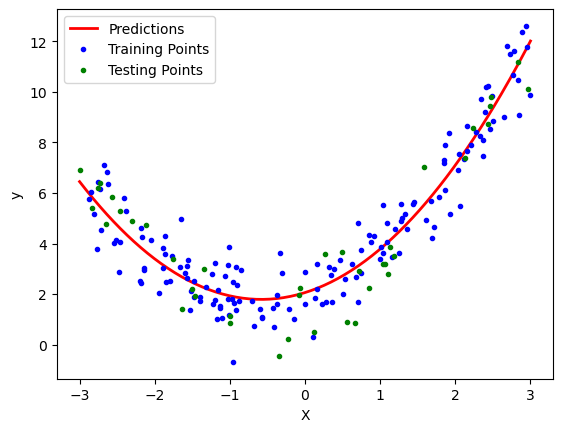

In [34]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, 'b.', label = 'Training Points')
plt.plot(X_test, y_test, 'g.', label = 'Testing Points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [41]:
def polynomial_Regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    X_new_poly = poly.fit_transform(X_new)
    
    polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
    scaler = StandardScaler()
    lr = LinearRegression()
    
    polynomial_regression = Pipeline([
        ('poly_features',polybig_features),
        ('scaler', scaler),
        ('lr',lr)
    ])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()
    
    

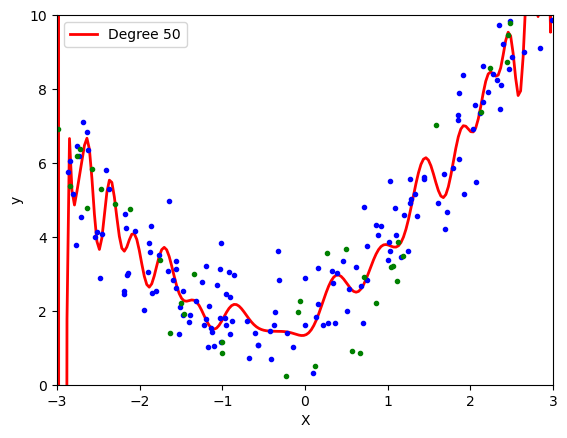

In [44]:
polynomial_Regression(50)

In [45]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)